In [ ]:
pip install tensorflow tensorflow-datasets


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

# Load the Oxford-IIIT Pet dataset
dataset, info = tfds.load('oxford_iiit_pet', with_info=True, as_supervised=True)

# Split the dataset into training and testing sets
train_dataset, test_dataset = dataset['train'], dataset['test']

# Display the dataset information
print(info)


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Class names: ['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


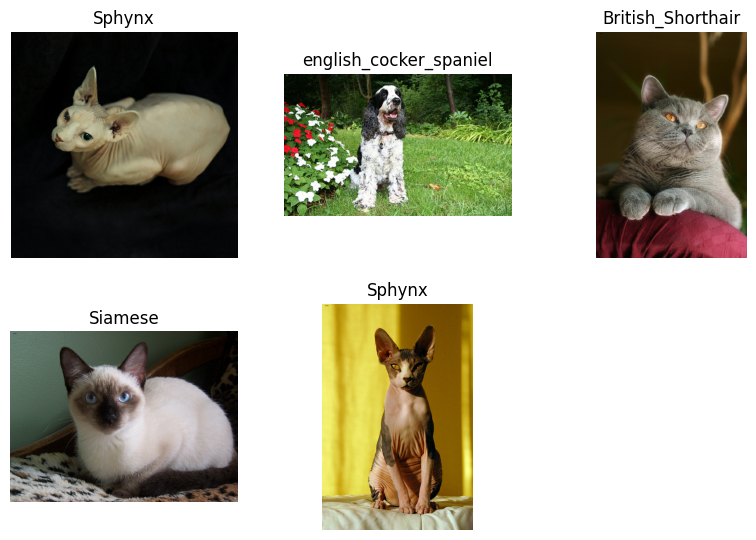

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

# Load the Oxford-IIIT Pet dataset
def load_data(split='train'):
    dataset, info = tfds.load('oxford_iiit_pet', split=split, shuffle_files=True, with_info=True, as_supervised=True)
    return dataset, info

# Load a subset of the train dataset and extract info
train_dataset, train_info = load_data('train[:10%]')

# Load a subset of the test dataset
test_dataset, test_info = load_data('test[:10%]')

# Get class names
class_names = train_info.features["label"].names
print("Class names:", class_names)

# Function to plot images and labels
def plot_images(dataset, class_names, num_images=5):
    plt.figure(figsize=(10, 10))
    for i, (image, label) in enumerate(dataset.take(num_images)):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(image)
        plt.title(class_names[label.numpy()])
        plt.axis("off")

# Plot a few images from the training dataset
plot_images(train_dataset, class_names)
plt.show()


Class names: ['Abyssinian', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'Bengal', 'Birman', 'Bombay', 'boxer', 'British_Shorthair', 'chihuahua', 'Egyptian_Mau', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'Maine_Coon', 'miniature_pinscher', 'newfoundland', 'Persian', 'pomeranian', 'pug', 'Ragdoll', 'Russian_Blue', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'Siamese', 'Sphynx', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


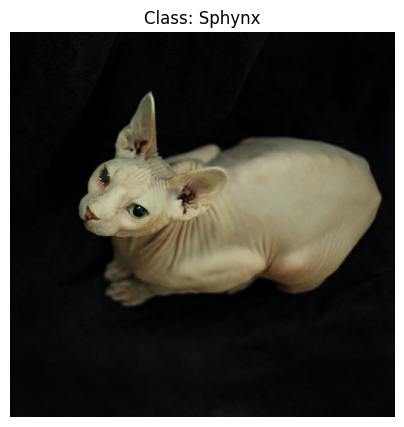

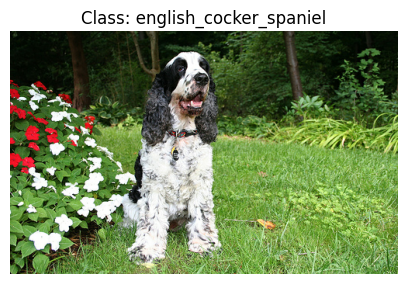

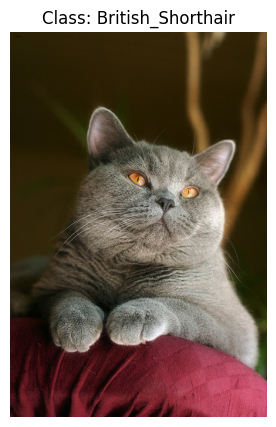

In [ ]:


# Load the Oxford-IIIT Pet dataset
def load_data(split='train'):
    dataset, info = tfds.load('oxford_iiit_pet', split=split, shuffle_files=True, with_info=True, as_supervised=True)
    return dataset, info

# Load a subset of the train dataset and extract info
train_dataset, train_info = load_data('train[:10%]')

# Get class names
class_names = train_info.features["label"].names
print("Class names:", class_names)

def display_examples(dataset, class_names, n=3):  # Display 'n' examples by default
    for image, label in dataset.take(n):
        plt.figure(figsize=(5, 5))
        plt.imshow(image)
        plt.title(f"Class: {class_names[label.numpy()]}")  # Display the class name
        plt.axis('off')  # Turn off axis
        plt.show()

# Display examples from the train dataset
display_examples(train_dataset, class_names)


Dog dataset


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.YJQGWK_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


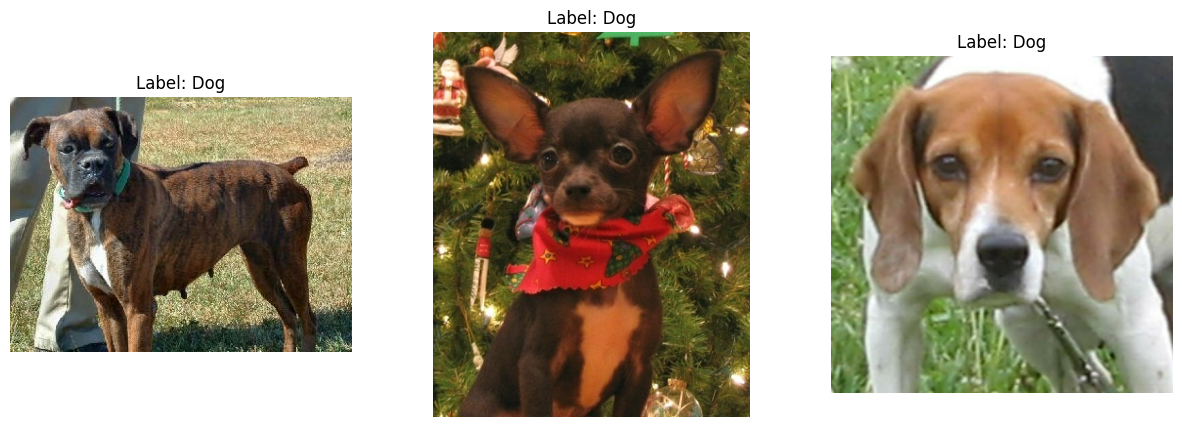

In [ ]:
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def load_cat_data(split='train'):
    dataset, info = tfds.load('cats_vs_dogs', split=split, with_info=True, as_supervised=True)
    return dataset, info

def display_examples_with_boxes(dataset, n=3):  # Display 'n' examples by default
    plt.figure(figsize=(15, 5))  # Adjust figure size for better layout
    for i, example in enumerate(dataset.take(n)):
        image = example['image']
        plt.subplot(1, n, i + 1)  # Create a subplot for each example
        plt.imshow(image)
        plt.title("Image with Bounding Boxes")
        plt.axis('off')  # Turn off axis

        # Draw ground truth boxes if available
        if 'objects' in example and 'bbox' in example['objects']:
            for box in example['objects']['bbox']:
                ymin, xmin, ymax, xmax = box
                rect = patches.Rectangle((xmin * image.shape[1], ymin * image.shape[0]),
                                        (xmax - xmin) * image.shape[1], (ymax - ymin) * image.shape[0],
                                        linewidth=1, edgecolor='g', facecolor='none')
                plt.gca().add_patch(rect)

    plt.show()


# Load the Cat Dataset train data and display examples
train_dataset, train_info = load_cat_data('train[:10%]')
display_examples(train_dataset)


In [ ]:
#Load a pre-trained object detection model
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

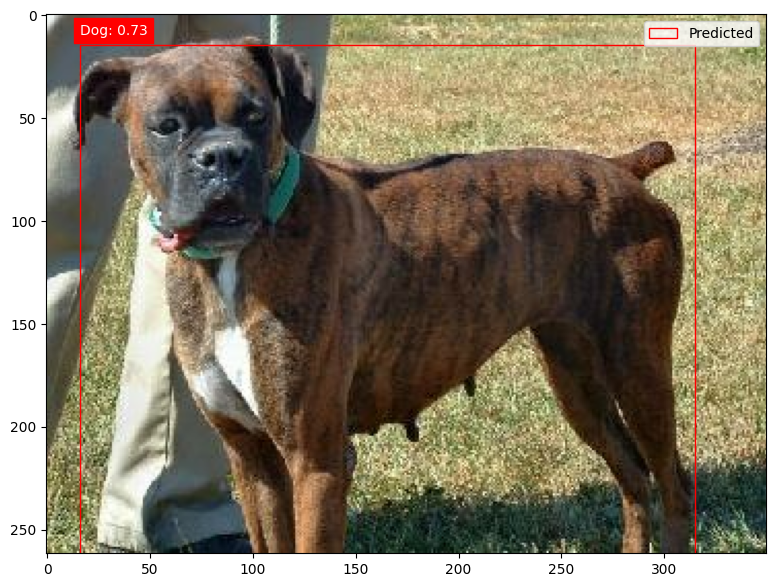

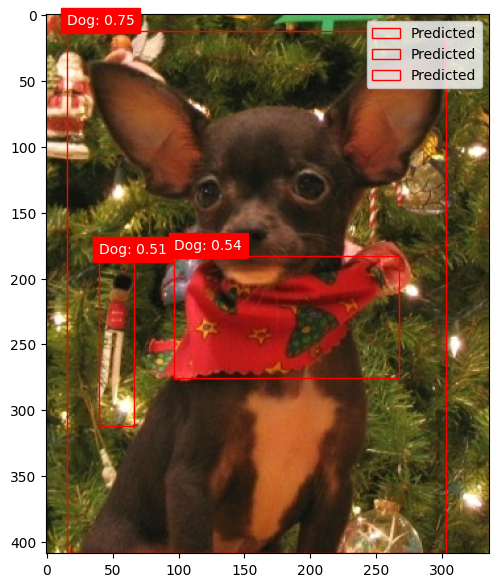

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load a pre-trained object detection model from TensorFlow Hub
detector = hub.load("https://tfhub.dev/tensorflow/ssd_mobilenet_v2/2")

def run_detector_and_visualize(image):
    # Preprocess and run detection
    converted_img = tf.image.convert_image_dtype(image, tf.uint8)[tf.newaxis, ...]
    result = detector(converted_img)
    result = {key: value.numpy() for key, value in result.items()}

    # Visualize results
    plt.figure(figsize=(10, 7))
    plt.imshow(image)

    # Predicted boxes
    for i, score in enumerate(result['detection_scores'][0]):
        if score > 0.5:  # Confidence threshold
            ymin, xmin, ymax, xmax = result['detection_boxes'][0][i]
            class_id = int(result['detection_classes'][0][i])

            # Handle class labels
            label = "Cat" if class_id == 1 else "Dog"  # Modify if your model's labels differ

            rect = patches.Rectangle((xmin * image.shape[1], ymin * image.shape[0]),
                                    (xmax - xmin) * image.shape[1], (ymax - ymin) * image.shape[0],
                                    linewidth=1, edgecolor='r', facecolor='none', label='Predicted')
            plt.gca().add_patch(rect)

            # Display class label and score
            plt.text(xmin * image.shape[1], ymin * image.shape[0] - 5, f'{label}: {score:.2f}',
                     color='white', backgroundcolor='red')

    plt.legend()
    plt.show()

# Load the dataset
def load_cat_data(split='train'):
    dataset, info = tfds.load('cats_vs_dogs', split=split, with_info=True, as_supervised=True)
    return dataset, info

# Display results for a few samples
def display_sample_with_detection(dataset, n=2):
    for image, label in dataset.take(n):
        run_detector_and_visualize(image)

# Load the dataset and visualize
train_dataset, _ = load_cat_data('train[:10%]')
display_sample_with_detection(train_dataset, n=2)
